# Ejercicio
Se desea encontrar el número de pacientes promedio en el consultorio de un doctor, para ello se realizan observaciones cada 5 minutos y se registran en la tabla siguiente
\begin{equation*}
\text{Estado Actual}=
\begin{bmatrix}
3 & 5 & 2 & 0 & 0\\
8 & 7 & 0 & 1 & 4\\
5 & 5 & 5 & 5 & 5\\
5 & 0 & 10 & 0 & 0\\
1 & 0 & 0 & 0 & 1
\end{bmatrix}
\text{Estado Futuro} 
\end{equation*}

# Solución Analítica

De acuerdo a lo anterior, el espacio de estados asociado a la cadena de Markov anterior es $S = \{0,1,2,3,4\}$, en donde: **0:= 0 Pacientes**, **1:= 1 Paciente**, **2:= 2 PAcientes** y **3:= Pacientes**.

La matriz de transición asociada a la cadena anterior es:
\begin{equation*}
P = 
\begin{bmatrix}
\frac{3}{10} & \frac{5}{10} & \frac{2}{10} & 0 & 0\\
\frac{8}{20} & \frac{7}{20} & 0 & \frac{1}{20} & \frac{4}{20}\\
\frac{5}{25} & \frac{5}{25} & \frac{5}{25} & \frac{5}{25} & \frac{5}{25}\\
\frac{5}{15} & 0 & \frac{10}{15} & 0 & 0\\
\frac{1}{2} & 0 & 0 & 0 & \frac{1}{2}
\end{bmatrix}
\end{equation*}

Utilizando la propiedad de la **distribución estacionaria** para una cadena de Markov, es decir,
\begin{equation*}
\begin{aligned}
\pi \textbf{P}  =& \pi\\
\begin{bmatrix}
\pi_0 & \pi_1 & \pi_2 & \pi_3 & \pi_4
\end{bmatrix} \times
\begin{bmatrix}
\frac{3}{10} & \frac{5}{10} & \frac{2}{10} & 0 & 0\\
\frac{8}{20} & \frac{7}{20} & 0 & \frac{1}{20} & \frac{4}{20}\\
\frac{5}{25} & \frac{5}{25} & \frac{5}{25} & \frac{5}{25} & \frac{5}{25}\\
\frac{5}{15} & 0 & \frac{10}{15} & 0 & 0\\
\frac{1}{2} & 0 & 0 & 0 & \frac{1}{2}
\end{bmatrix} 
&=
\begin{bmatrix}
\pi_0 \\
\pi_1\\
\pi_2\\
\pi_3\\
\pi_4
\end{bmatrix}
\\
\end{aligned}
\end{equation*}
Además de esto, sabemos que se debe de satisfacer que todos los valores sean no negativos y además su suma sea igual a uno, es decir
\begin{equation*}
\pi_0 + \pi_1 + \pi_2 + \pi_3 + \pi_4 = 1
\end{equation*}
Entonces, remplazamos esta condición con alguna ecuación del sistema de ecuaciones



\begin{equation*}
\begin{aligned}
\begin{bmatrix}
-\frac{7}{10} & \frac{8}{20} & \frac{1}{5} & \frac{5}{15} & \frac{1}{2} \\
\frac{5}{10} & -\frac{13}{20} & \frac{1}{5} & 0 & 0 \\
\frac{2}{10} & 0 & -\frac{4}{5} & \frac{10}{15} & 0 \\
0 & \frac{1}{20} & \frac{1}{5} & -1 & 0 \\
1 & 1 & 1 & 1 & 1
\end{bmatrix}  \times 
\begin{bmatrix}
\pi_0 \\
\pi_1\\
\pi_2\\
\pi_3\\
\pi_4
\end{bmatrix} &=
\begin{bmatrix}
0\\
0\\
0\\
0\\
1
\end{bmatrix}
\\
\end{aligned}
\end{equation*}

Resolviendo el sistema de ecuaciones, tenemos:
\begin{equation*}
\begin{aligned}
\pi_0 &= \frac{160}{451}\\
\pi_1 &= \frac{140}{451}\\
\pi_2 &= \frac{5}{41}\\
\pi_3 &= \frac{18}{451}\\
\pi_4 &= \frac{78}{451}
\end{aligned}
\end{equation*}
## Es decir, el valor esperado de pacientes es:
\begin{equation*}
\begin{aligned}
E[\text{número de pacientes}] &= \sum_{i=0}^4 i \times p_i \\
&= 0\left(\frac{160}{451}\right) + 1\left(\frac{140}{451}\right) + 2\left(\frac{5}{41}\right) + 3\left(\frac{18}{451}\right) + 4\left(\frac{78}{451}\right)\\
& \approx 1.3658 \quad \blacksquare
\end{aligned}
\end{equation*}


# Solución por Simulación

In [46]:
import numpy as np
import random
from scipy.stats import norm
import math
import matplotlib.pyplot as plt

In [47]:
import random
def exper(N):
    pacientes=[] #Guardara las probabilidades de que haya interferencia entre el cojinete y la flecha en la iteración i.
    ensayos=[]
    
    probabilidades = [[3/10, 5/10, 2/10, 0, 0],
                      [8/20, 7/20, 0, 1/20, 4/20],
                      [1/5, 1/5, 1/5, 1/5, 1/5],
                      [5/15, 0, 10/15, 0, 0],
                      [1/2, 0, 0, 0, 1/2]] #probabilidades de transicion
    
    estados = [0,1,2,3,4] #numero de pacientes
    
   # N = 10000
    pacientes_totales = 0
    for j in range(1,N+1):
        pacientes_inicial = random.choice(estados) #selecciona 1 de los 5 estados con la misma probabilidad para iniciar el día
        for i in range(100): #100 observaciones durante el dia
            pacientes_final = random.choices(estados, weights=probabilidades[pacientes_inicial])[0] #selecciona 1 de los 5 estados con 
            #probabilidad de acuerdo a la matriz de transicion, esto igual guarda
            pacientes_inicial = pacientes_final
        pacientes_totales += pacientes_final
        ensayos.append(j) #Se va guardando en una lista la iteración i.
        pacientes.append(pacientes_totales/j) #Se va guardadndo los pacientes esperados en la iteración i
    return pacientes

In [48]:
exp = exper(1000) #Hara el experimento antes descrito 1500 veces, es decir, nos dara 
#1500 aproximaciones s la probabilidad para ver cuando se logra estabilizar.

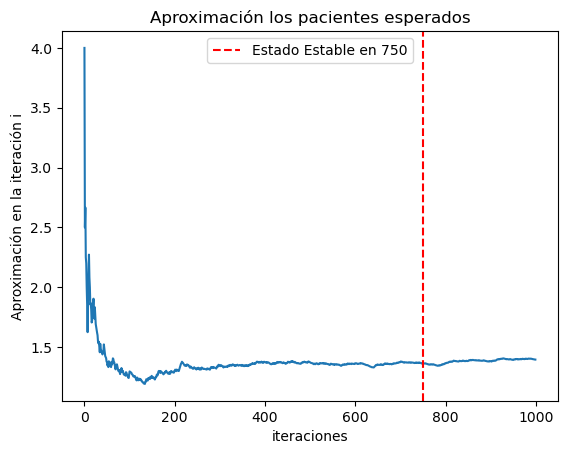

In [49]:
plt.plot(exp) #Grafica la lista de aproximaciones de acuerdo a la cantidad de experimentos realizados.
plt.xlabel('iteraciones')
plt.ylabel('Aproximación en la iteración i')
plt.title('Aproximación los pacientes esperados')

# Agrega una línea vertical en la iteración 750 que de manera visual es donde comienza el estado estable.
plt.axvline(x=750, color='red', linestyle='--', label='Estado Estable en 750')

plt.legend()  # Muestra la leyenda si es necesario
plt.show()

In [50]:
def valor(repeticiones): #Esta función hara la simulación anterior muchas veces, es decir, hará "repeticiones" cantidad de veces
    Num_pacientes = []
    for i in range(repeticiones):
        Num_pacientes.append(np.mean(exper(750))) #Calcula la media de 750 experiementos unas N (repeticiones) cantidad de veces.
    return Num_pacientes #Nos regresa N (repeticiones) medias de 750 experimentos cada una.

In [51]:
N=100
simulacion = valor(N)

In [52]:
np.mean(simulacion)

1.3650667048081688

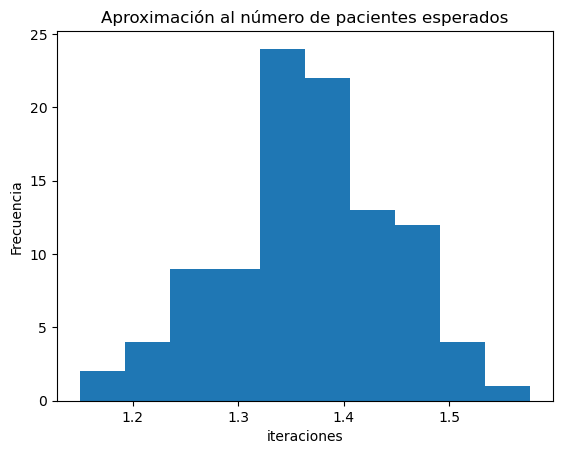

In [53]:
plt.hist(simulacion) #Grafica las frecuencias de la aproximación a la probabilidad de las N simualciones con 750 experiementos cada una.
plt.xlabel('iteraciones')
plt.ylabel('Frecuencia')
plt.title('Aproximación al número de pacientes esperados')
plt.show()

**PASO 9**. Calcule la media del área bajo la curva de la función y su desviación estándar.

In [54]:
media = np.mean(simulacion) #Calcula la media de esas N simulaciones
var = np.var(simulacion) #Calcula la varianza de esas N simulaciones
desv = np.std(simulacion) #Calcula la desvaicion de esas N simulaciones

**PASO 10**. Halle el intervalo de confianza del valor de la integral con un nivel de confianza del $95 \%$.
\begin{equation*}
\overline{x}- Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}} < \mu < \overline{x}+ Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}}
\end{equation*}

In [55]:
from scipy.stats import norm #Importamos la libreria para poder obtener el valor de Z.
alpha = 1 - 0.95 #Alpha es igual a 1 - la confianza del intervalo
z_alpha_2 = norm.ppf(1-alpha / 2) #Mandamos a pedir el valor de Z para \alpha/2, sabemos que si es el 95% de confienza, Z esta cercano al 1.96.
l_inferior = media - z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite inferior por la formula
l_superior = media + z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite superior por la formula
print("Entonces: ", l_inferior, "< \u03BC <", l_superior) #El intervalo en donde se encuentra el valor real a una confienza del 95%

Entonces:  1.3493115036932142 < μ < 1.3808219059231235
